# BACKGROUND

# OBJECTIVES


# OBTAIN


## Imports

In [181]:
import pandas as pd
import os
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import requests

In [182]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score, plot_confusion_matrix
from sklearn.tree import export_graphviz
from sklearn.preprocessing import OneHotEncoder 
from sklearn.tree import export_graphviz
from pydotplus import graph_from_dot_data
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

## PFF (ProFootball Focus)

In [183]:
pwd

'/Users/jlemaster/mod6_capstone/CapstoneFantasyFootball'

In [184]:
ls


README.md                             footballoutsiders2018.csv
Untitled.ipynb                        footballoutsiders2019.csv
allpff.csv                            pff_stas_rr_2019.csv
fantasyfootball-Copy1.ipynb           pff_stats_rr_2017.csv
fantasyfootball-classification.ipynb  pff_stats_rr_2018.csv
fantasyfootball.ipynb                 players_sportsio.json


In [185]:
# Set Max Display..showing all columns
pd.set_option("display.max_columns", 0)

### DFF 2019

In [186]:
df_pff2019 = pd.read_csv('pff_stas_rr_2019.csv')
df_pff2019['year']=2019
df_pff2019.head()

,player,team,games,position,recTarg,recRec,recRec40s,recYds,recYds100Games,recTds,recTd40s,recDrops,catch,depth,ypt,ypr,rac,rzRecTarg,rzRecRec,rzRecTds,rzRecTargPct,rzRecRecPct,rzRecTdPct,ezRecTarg,ezRecTds,ezRecTargPct,ezRecRecPct,ezRecTdPct,rushCarries,rush40s,rushYds,rushYds100Games,rushTds,rushTd40s,ypc,yac,rushTa,tat,fumbles,rzRushCarries,rzRushTds,rzRushPct,rzRushTdPct,i5RushCarries,i5RushTds,i5RushPct,i5RushTdPct,patConversions,patAttempts,fantasyPts,ptsPerSnap,ptsPerTouch,year
0,Brandon Zylstra,CAR,7,WR,12,8,1,106,0,0,0,1,66.7,13.50,8.83,13.25,1.63,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0.0,0.0,0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,14.6,0.21,1.82,2019
1,Alexander Hollins,MIN,5,WR,4,2,0,46,0,0,0,1,50.0,19.00,11.50,23.00,2.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0.0,0.0,0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,5.6,0.08,2.80,2019
2,Darious Williams,LA,1,WR,0,0,0,0,0,0,0,0,0.0,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0.0,0.0,0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0.0,0.00,NaN,2019
3,Keelan Cole,JAX,16,WR,36,24,2,361,0,3,0,1,66.7,12.08,10.03,15.04,4.38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,6,0,0,0,6.0,5.0,0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,66.7,0.18,2.67,2019
4,Gary Jennings,MIA,1,WR,0,0,0,0,0,0,0,0,0.0,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0.0,0.0,0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0.0,0.00,NaN,2019


### DFF 2018

In [187]:
df_pff2018 = pd.read_csv('pff_stats_rr_2018.csv')
df_pff2018['year']=2018
df_pff2018.head()

,player,team,games,position,recTarg,recRec,recRec40s,recYds,recYds100Games,recTds,recTd40s,recDrops,catch,depth,ypt,ypr,rac,rzRecTarg,rzRecRec,rzRecTds,rzRecTargPct,rzRecRecPct,rzRecTdPct,ezRecTarg,ezRecTds,ezRecTargPct,ezRecRecPct,ezRecTdPct,rushCarries,rush40s,rushYds,rushYds100Games,rushTds,rushTd40s,ypc,yac,rushTa,tat,fumbles,rzRushCarries,rzRushTds,rzRushPct,rzRushTdPct,i5RushCarries,i5RushTds,i5RushPct,i5RushTdPct,patConversions,patAttempts,fantasyPts,ptsPerSnap,ptsPerTouch,year
0,Vyncint Smith,HST,6,WR,9,5,0,91,0,1,0,1,55.6,23.33,10.11,18.20,0.80,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0.00,0.00,0,0.00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,17.6,0.10,3.52,2018
1,Keelan Cole,JAX,16,WR,64,38,0,491,1,1,0,6,59.4,10.19,7.67,12.92,3.63,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0.00,0.00,0,0.00,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,74.1,0.11,1.95,2018
2,Derrick Willies,CLV,4,WR,5,3,0,61,0,0,0,0,60.0,11.80,12.20,20.33,11.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0.00,0.00,0,0.00,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,7.6,0.25,2.53,2018
3,D.J. Moore,CAR,16,WR,76,54,3,781,1,2,1,4,71.1,9.62,10.28,14.46,7.91,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,0,172,0,0,0,13.23,7.77,6,0.46,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,134.3,0.18,2.00,2018
4,Calvin Ridley,ATL,16,WR,91,64,4,821,1,10,3,8,70.3,10.38,9.02,12.83,5.73,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,0,24,0,0,0,4.80,3.00,1,0.20,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,176.5,0.27,2.56,2018


In [188]:
ls

README.md                             footballoutsiders2018.csv
Untitled.ipynb                        footballoutsiders2019.csv
allpff.csv                            pff_stas_rr_2019.csv
fantasyfootball-Copy1.ipynb           pff_stats_rr_2017.csv
fantasyfootball-classification.ipynb  pff_stats_rr_2018.csv
fantasyfootball.ipynb                 players_sportsio.json


### DFF 2017

In [189]:
df_pff2017 = pd.read_csv('pff_stats_rr_2017.csv')
df_pff2017['year']=2017
df_pff2017.head()

,player,team,games,position,recTarg,recRec,recRec40s,recYds,recYds100Games,recTds,recTd40s,recDrops,catch,depth,ypt,ypr,rac,rzRecTarg,rzRecRec,rzRecTds,rzRecTargPct,rzRecRecPct,rzRecTdPct,ezRecTarg,ezRecTds,ezRecTargPct,ezRecRecPct,ezRecTdPct,rushCarries,rush40s,rushYds,rushYds100Games,rushTds,rushTd40s,ypc,yac,rushTa,tat,fumbles,rzRushCarries,rzRushTds,rzRushPct,rzRushTdPct,i5RushCarries,i5RushTds,i5RushPct,i5RushTdPct,patConversions,patAttempts,fantasyPts,ptsPerSnap,ptsPerTouch,year
0,Isaac Whitney,OAK,2,WR,1,0,0,0,0,0,0,0,0.0,52.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0.0,0.0,0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0.0,0.00,NaN,2017
1,Tanner Gentry,CHI,4,WR,5,3,0,35,0,0,0,1,60.0,10.80,7.00,11.67,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0.0,0.0,0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,5.0,0.03,1.67,2017
2,Bug Howard,CLV,0,WR,0,0,0,0,0,0,0,0,0.0,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0.0,0.0,0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0.0,NaN,NaN,2017
3,Michael Clark,GB,2,WR,14,4,0,41,0,0,0,1,28.6,16.71,2.93,10.25,2.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0.0,0.0,0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,6.1,0.08,1.52,2017
4,C.J. Board,CLV,0,WR,0,0,0,0,0,0,0,0,0.0,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0.0,0.0,0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0.0,NaN,NaN,2017


## Football Outsiders (FO)

### Web Scraping (WS)

### WS Imports

In [190]:
from bs4 import BeautifulSoup
import requests
import re

### FO HTML

In [191]:
# A get request to retrieve the page
html_page = requests.get('https://www.footballoutsiders.com/stats/nfl/team-offense/2018')

# Pass the page contents to BeautifulSoup for parsing
soup = BeautifulSoup(html_page.content, 'html.parser') 

In [192]:
soup.prettify

<bound method Tag.prettify of <!DOCTYPE html>

<html dir="ltr" lang="en" prefix="og: https://ogp.me/ns#">
<head>
<meta charset="utf-8"/><script type="text/javascript">(window.NREUM||(NREUM={})).loader_config={licenseKey:"99579933b3",applicationID:"172747594"};window.NREUM||(NREUM={}),__nr_require=function(e,n,t){function r(t){if(!n[t]){var i=n[t]={exports:{}};e[t][0].call(i.exports,function(n){var i=e[t][1][n];return r(i||n)},i,i.exports)}return n[t].exports}if("function"==typeof __nr_require)return __nr_require;for(var i=0;i<t.length;i++)r(t[i]);return r}({1:[function(e,n,t){function r(){}function i(e,n,t){return function(){return o(e,[u.now()].concat(f(arguments)),n?null:this,t),n?void 0:this}}var o=e("handle"),a=e(4),f=e(5),c=e("ee").get("tracer"),u=e("loader"),s=NREUM;"undefined"==typeof window.newrelic&&(newrelic=s);var p=["setPageViewName","setCustomAttribute","setErrorHandler","finished","addToTrace","inlineHit","addRelease"],l="api-",d=l+"ixn-";a(p,function(e,n){s[n]=i(l+n,!0,"

### HTML Table from FO

In [193]:
table = soup.find_all('table')

In [194]:
table

[<table border="2" cellpadding="3" cellspacing="0" class="sticky-headers sortable stats" style="padding: 0px;">
 <thead class="tableFloatingHeaderOriginal">
 <tr>
 <th><b>RK</b></th>
 <th align="center"><b>TEAM</b></th>
 <th align="center"><b>OFFENSE<br/>
 			DVOA</b></th>
 <th align="center"><b>LAST<br/>
 			YEAR</b></th>
 <th align="center" bgcolor="#CCCCCC"><font color="#0000FF"><b>WEI.<br/>
 			OFFENSE</b></font></th>
 <th align="center" bgcolor="#CCCCCC"><font color="#0000FF"><b>RK</b></font></th>
 <th align="center"><b>PASS<br/>
 			OFF</b></th>
 <th align="center"><b>RK</b></th>
 <th align="center"><b>RUSH<br/>
 			OFF</b></th>
 <th align="center"><b>RK</b></th>
 <th align="center" bgcolor="#CCCCCC"><b>NON-ADJ<br/>
 			TOTAL</b></th>
 <th align="center" bgcolor="#CCCCCC"><b>NON-ADJ<br/>
 			PASS</b></th>
 <th align="center" bgcolor="#CCCCCC"><b>NON-ADJ<br/>
 			RUSH</b></th>
 <th align="center"><b>VAR</b></th>
 <th align="center"><b>RK</b></th>
 <th align="center"><b>SCHED</b></

### Searching to Find Data

In [195]:
header = soup.find_all('th')
header[0].text

'RK'

In [196]:
headers = [tag.text.replace('\n', '') for tag in header]
headers

['RK',
 'TEAM',
 'OFFENSE\t\t\tDVOA',
 'LAST\t\t\tYEAR',
 'WEI.\t\t\tOFFENSE',
 'RK',
 'PASS\t\t\tOFF',
 'RK',
 'RUSH\t\t\tOFF',
 'RK',
 'NON-ADJ\t\t\tTOTAL',
 'NON-ADJ\t\t\tPASS',
 'NON-ADJ\t\t\tRUSH',
 'VAR',
 'RK',
 'SCHED',
 'RK',
 'RK',
 'TEAM',
 'OFFENSE\t\t\tDVOA',
 'LAST\t\t\tYEAR',
 'WEI.\t\t\tOFFENSE',
 'RK',
 'PASS\t\t\tOFF',
 'RK',
 'RUSH\t\t\tOFF',
 'RK',
 'NON-ADJ\t\t\tTOTAL',
 'NON-ADJ\t\t\tPASS',
 'NON-ADJ\t\t\tRUSH',
 'VAR',
 'RK',
 'SCHED',
 'RK']

In [197]:
len(headers)

34

In [198]:
rows = table[0].find_all('tr')

### Found the Data

In [199]:
# FOUND THE DATA IN THE TABLE!!!
rows[10].text

'\n9\nSEA\n8.8%\n14\n11.3%\n9\n27.2%\n6\n4.3%\n6\n11.0%\n32.2%\n4.5%\n4.6%\n7\n0.2%\n16\n'

In [200]:
test_row = rows[10].text
split_row = test_row.split('\n')

split_row[1:-2]

['9',
 'SEA',
 '8.8%',
 '14',
 '11.3%',
 '9',
 '27.2%',
 '6',
 '4.3%',
 '6',
 '11.0%',
 '32.2%',
 '4.5%',
 '4.6%',
 '7',
 '0.2%']

In [201]:
len(split_row)

19

In [202]:
header_row = rows[0].text
split_header_row = header_row.split('\n')

In [203]:
display(split_header_row),len(split_header_row)

['',
 'RK',
 'TEAM',
 'OFFENSE',
 '\t\t\tDVOA',
 'LAST',
 '\t\t\tYEAR',
 'WEI.',
 '\t\t\tOFFENSE',
 'RK',
 'PASS',
 '\t\t\tOFF',
 'RK',
 'RUSH',
 '\t\t\tOFF',
 'RK',
 'NON-ADJ',
 '\t\t\tTOTAL',
 'NON-ADJ',
 '\t\t\tPASS',
 'NON-ADJ',
 '\t\t\tRUSH',
 'VAR',
 'RK',
 'SCHED',
 'RK',
 '']

(None, 27)

In [204]:
headers, len(headers)

(['RK',
  'TEAM',
  'OFFENSE\t\t\tDVOA',
  'LAST\t\t\tYEAR',
  'WEI.\t\t\tOFFENSE',
  'RK',
  'PASS\t\t\tOFF',
  'RK',
  'RUSH\t\t\tOFF',
  'RK',
  'NON-ADJ\t\t\tTOTAL',
  'NON-ADJ\t\t\tPASS',
  'NON-ADJ\t\t\tRUSH',
  'VAR',
  'RK',
  'SCHED',
  'RK',
  'RK',
  'TEAM',
  'OFFENSE\t\t\tDVOA',
  'LAST\t\t\tYEAR',
  'WEI.\t\t\tOFFENSE',
  'RK',
  'PASS\t\t\tOFF',
  'RK',
  'RUSH\t\t\tOFF',
  'RK',
  'NON-ADJ\t\t\tTOTAL',
  'NON-ADJ\t\t\tPASS',
  'NON-ADJ\t\t\tRUSH',
  'VAR',
  'RK',
  'SCHED',
  'RK'],
 34)

In [205]:
rows[0].text, rows[1].text,rows[2].text

('\nRK\nTEAM\nOFFENSE\n\t\t\tDVOA\nLAST\n\t\t\tYEAR\nWEI.\n\t\t\tOFFENSE\nRK\nPASS\n\t\t\tOFF\nRK\nRUSH\n\t\t\tOFF\nRK\nNON-ADJ\n\t\t\tTOTAL\nNON-ADJ\n\t\t\tPASS\nNON-ADJ\n\t\t\tRUSH\nVAR\nRK\nSCHED\nRK\n',
 '\nRK\nTEAM\nOFFENSE\n\t\t\tDVOA\nLAST\n\t\t\tYEAR\nWEI.\n\t\t\tOFFENSE\nRK\nPASS\n\t\t\tOFF\nRK\nRUSH\n\t\t\tOFF\nRK\nNON-ADJ\n\t\t\tTOTAL\nNON-ADJ\n\t\t\tPASS\nNON-ADJ\n\t\t\tRUSH\nVAR\nRK\nSCHED\nRK\n',
 '\n1\nKC\n34.2%\n4\n30.6%\n1\n62.9%\n1\n11.0%\n4\n33.1%\n60.2%\n12.2%\n7.7%\n22\n-0.9%\n11\n')

In [206]:
full_table = []#headers]
for row in rows[1:]:
    test_row = row.text
    #import pdb
    #pdb.set_trace()
    split_row = test_row.split('\n')
    cut_row = split_row[1:-1]
    display(cut_row,len(cut_row))

    full_table.append(cut_row)
    
#full_table

['RK',
 'TEAM',
 'OFFENSE',
 '\t\t\tDVOA',
 'LAST',
 '\t\t\tYEAR',
 'WEI.',
 '\t\t\tOFFENSE',
 'RK',
 'PASS',
 '\t\t\tOFF',
 'RK',
 'RUSH',
 '\t\t\tOFF',
 'RK',
 'NON-ADJ',
 '\t\t\tTOTAL',
 'NON-ADJ',
 '\t\t\tPASS',
 'NON-ADJ',
 '\t\t\tRUSH',
 'VAR',
 'RK',
 'SCHED',
 'RK']

25

['1',
 'KC',
 '34.2%',
 '4',
 '30.6%',
 '1',
 '62.9%',
 '1',
 '11.0%',
 '4',
 '33.1%',
 '60.2%',
 '12.2%',
 '7.7%',
 '22',
 '-0.9%',
 '11']

17

['2',
 'LAR',
 '24.6%',
 '6',
 '19.3%',
 '2',
 '32.9%',
 '5',
 '21.3%',
 '1',
 '24.1%',
 '32.7%',
 '20.4%',
 '10.1%',
 '28',
 '-0.2%',
 '15']

17

['3',
 'LAC',
 '20.7%',
 '7',
 '17.1%',
 '3',
 '41.6%',
 '2',
 '4.2%',
 '7',
 '21.2%',
 '39.8%',
 '7.4%',
 '4.9%',
 '8',
 '0.3%',
 '17']

17

['4',
 'NO',
 '15.9%',
 '2',
 '13.4%',
 '7',
 '34.5%',
 '3',
 '3.3%',
 '8',
 '17.5%',
 '36.8%',
 '4.3%',
 '7.0%',
 '18',
 '3.4%',
 '31']

17

['5',
 'NE',
 '14.5%',
 '1',
 '16.1%',
 '4',
 '33.0%',
 '4',
 '2.5%',
 '9',
 '13.9%',
 '32.4%',
 '2.1%',
 '3.7%',
 '5',
 '-2.5%',
 '4']

17

['6',
 'PIT',
 '13.8%',
 '3',
 '15.0%',
 '6',
 '25.5%',
 '8',
 '-2.4%',
 '12',
 '12.9%',
 '22.4%',
 '0.8%',
 '6.4%',
 '14',
 '0.8%',
 '22']

17

['7',
 'GB',
 '11.1%',
 '15',
 '10.4%',
 '10',
 '18.0%',
 '12',
 '12.4%',
 '3',
 '8.9%',
 '13.8%',
 '13.9%',
 '6.9%',
 '17',
 '-2.3%',
 '5']

17

['8',
 'ATL',
 '8.8%',
 '9',
 '7.8%',
 '11',
 '26.7%',
 '7',
 '-10.7%',
 '22',
 '11.7%',
 '29.5%',
 '-7.5%',
 '9.4%',
 '26',
 '2.6%',
 '30']

17

['9',
 'SEA',
 '8.8%',
 '14',
 '11.3%',
 '9',
 '27.2%',
 '6',
 '4.3%',
 '6',
 '11.0%',
 '32.2%',
 '4.5%',
 '4.6%',
 '7',
 '0.2%',
 '16']

17

['10',
 'IND',
 '8.2%',
 '29',
 '15.9%',
 '5',
 '21.3%',
 '10',
 '-3.2%',
 '13',
 '7.9%',
 '21.9%',
 '-5.1%',
 '6.1%',
 '12',
 '-0.7%',
 '14']

17

['11',
 'CAR',
 '6.0%',
 '17',
 '4.1%',
 '12',
 '9.2%',
 '19',
 '12.9%',
 '2',
 '10.7%',
 '16.3%',
 '14.7%',
 '7.5%',
 '21',
 '3.5%',
 '32']

17

['12',
 'TB',
 '5.9%',
 '11',
 '4.0%',
 '13',
 '24.0%',
 '9',
 '-11.9%',
 '24',
 '4.9%',
 '24.9%',
 '-15.7%',
 '5.8%',
 '10',
 '0.5%',
 '19']

17

['13',
 'NYG',
 '1.3%',
 '23',
 '1.1%',
 '15',
 '14.9%',
 '15',
 '-6.5%',
 '16',
 '-1.2%',
 '13.8%',
 '-11.0%',
 '5.5%',
 '9',
 '-0.8%',
 '13']

17

['14',
 'DEN',
 '1.1%',
 '31',
 '-0.4%',
 '17',
 '0.4%',
 '24',
 '7.7%',
 '5',
 '3.3%',
 '2.5%',
 '10.1%',
 '4.4%',
 '6',
 '1.5%',
 '25']

17

['15',
 'BAL',
 '0.9%',
 '21',
 '-1.3%',
 '19',
 '15.7%',
 '14',
 '-1.9%',
 '10',
 '2.3%',
 '13.3%',
 '3.1%',
 '2.9%',
 '2',
 '2.0%',
 '27']

17

['16',
 'PHI',
 '-0.3%',
 '8',
 '3.7%',
 '14',
 '18.0%',
 '11',
 '-13.6%',
 '27',
 '0.8%',
 '19.1%',
 '-12.3%',
 '3.5%',
 '3',
 '0.6%',
 '20']

17

['17',
 'CLE',
 '-1.1%',
 '32',
 '12.3%',
 '8',
 '7.8%',
 '21',
 '-6.6%',
 '17',
 '1.3%',
 '8.6%',
 '-2.1%',
 '7.1%',
 '19',
 '1.3%',
 '24']

17

['18',
 'MIN',
 '-1.3%',
 '5',
 '-1.1%',
 '18',
 '13.4%',
 '16',
 '-16.3%',
 '28',
 '-5.6%',
 '9.2%',
 '-20.8%',
 '2.8%',
 '1',
 '-0.9%',
 '9']

17

['19',
 'CIN',
 '-3.3%',
 '22',
 '-10.0%',
 '24',
 '9.5%',
 '18',
 '-3.6%',
 '14',
 '-2.6%',
 '9.9%',
 '-2.3%',
 '7.7%',
 '23',
 '0.3%',
 '18']

17

['20',
 'CHI',
 '-3.4%',
 '28',
 '-2.3%',
 '21',
 '8.5%',
 '20',
 '-7.0%',
 '19',
 '0.3%',
 '14.1%',
 '-5.4%',
 '8.1%',
 '24',
 '2.5%',
 '29']

17

['21',
 'HOU',
 '-3.5%',
 '25',
 '-1.4%',
 '20',
 '17.8%',
 '13',
 '-13.0%',
 '26',
 '-3.2%',
 '17.4%',
 '-11.8%',
 '7.1%',
 '20',
 '-2.3%',
 '6']

17

['22',
 'TEN',
 '-5.1%',
 '18',
 '0.8%',
 '16',
 '-0.2%',
 '25',
 '-2.3%',
 '11',
 '-6.3%',
 '1.8%',
 '-6.3%',
 '8.9%',
 '25',
 '-3.6%',
 '2']

17

['23',
 'DET',
 '-5.2%',
 '12',
 '-2.7%',
 '22',
 '3.7%',
 '22',
 '-12.0%',
 '25',
 '-7.2%',
 '0.5%',
 '-12.2%',
 '6.8%',
 '15',
 '-3.0%',
 '3']

17

['24',
 'DAL',
 '-6.6%',
 '10',
 '-4.2%',
 '23',
 '-0.8%',
 '26',
 '-6.9%',
 '18',
 '-3.4%',
 '0.1%',
 '-1.0%',
 '3.7%',
 '4',
 '2.2%',
 '28']

17

['25',
 'OAK',
 '-7.1%',
 '13',
 '-10.5%',
 '25',
 '12.0%',
 '17',
 '-16.5%',
 '29',
 '-9.5%',
 '8.2%',
 '-17.3%',
 '11.8%',
 '29',
 '-0.8%',
 '12']

17

['26',
 'MIA',
 '-8.9%',
 '27',
 '-11.9%',
 '26',
 '-3.7%',
 '27',
 '-4.4%',
 '15',
 '-14.3%',
 '-10.6%',
 '-8.3%',
 '15.8%',
 '32',
 '-2.3%',
 '7']

17

['27',
 'SF',
 '-15.4%',
 '19',
 '-16.5%',
 '28',
 '2.9%',
 '23',
 '-22.4%',
 '32',
 '-14.4%',
 '2.2%',
 '-19.6%',
 '6.9%',
 '16',
 '0.6%',
 '21']

17

['28',
 'NYJ',
 '-19.5%',
 '24',
 '-16.3%',
 '27',
 '-8.2%',
 '28',
 '-20.7%',
 '30',
 '-22.7%',
 '-9.8%',
 '-25.9%',
 '9.7%',
 '27',
 '-4.0%',
 '1']

17

['29',
 'WAS',
 '-19.5%',
 '20',
 '-28.6%',
 '31',
 '-19.5%',
 '29',
 '-7.1%',
 '20',
 '-15.4%',
 '-11.6%',
 '-7.2%',
 '12.3%',
 '30',
 '1.6%',
 '26']

17

['30',
 'JAX',
 '-22.0%',
 '16',
 '-26.6%',
 '30',
 '-24.3%',
 '30',
 '-10.6%',
 '21',
 '-21.8%',
 '-20.8%',
 '-14.4%',
 '6.2%',
 '13',
 '-0.9%',
 '10']

17

['31',
 'BUF',
 '-27.5%',
 '26',
 '-16.6%',
 '29',
 '-36.0%',
 '31',
 '-11.4%',
 '23',
 '-27.8%',
 '-37.2%',
 '-10.8%',
 '13.6%',
 '31',
 '-2.1%',
 '8']

17

['32',
 'ARI',
 '-41.1%',
 '30',
 '-44.4%',
 '32',
 '-46.9%',
 '32',
 '-21.4%',
 '31',
 '-40.2%',
 '-46.9%',
 '-19.1%',
 '5.9%',
 '11',
 '0.9%',
 '23']

17

In [207]:
full_table[1]

['1',
 'KC',
 '34.2%',
 '4',
 '30.6%',
 '1',
 '62.9%',
 '1',
 '11.0%',
 '4',
 '33.1%',
 '60.2%',
 '12.2%',
 '7.7%',
 '22',
 '-0.9%',
 '11']

In [208]:
for i in range(len(headers)):
    headers[i] =  headers[i].replace('\t','')
headers = headers[:17]
len(headers)

17

In [209]:
df_FO = pd.DataFrame(full_table[1:],columns=headers)#full_table[0])
#columns = df_FO.columns
df_FO.head(3)


,RK,TEAM,OFFENSEDVOA,LASTYEAR,WEI.OFFENSE,RK,PASSOFF,RK,RUSHOFF,RK,NON-ADJTOTAL,NON-ADJPASS,NON-ADJRUSH,VAR,RK,SCHED,RK
0,1,KC,34.2%,4,30.6%,1,62.9%,1,11.0%,4,33.1%,60.2%,12.2%,7.7%,22,-0.9%,11
1,2,LAR,24.6%,6,19.3%,2,32.9%,5,21.3%,1,24.1%,32.7%,20.4%,10.1%,28,-0.2%,15
2,3,LAC,20.7%,7,17.1%,3,41.6%,2,4.2%,7,21.2%,39.8%,7.4%,4.9%,8,0.3%,17


In [210]:
#df_FO.drop(columns=['LASTYEAR', 'RK'], inplace=True)
new_col_names = ['RK_TEAM', 'TEAM', 'OFFENSEDVOA', 'LASTYEAR', 
                 'WEI.OFFENSE', 'RK_WEI.OFFENSE', 'PASSOFF',
       'RK_PASSOFF', 'RUSHOFF', 'RK_RUSHOFF', 'NON-ADJTOTAL', 'NON-ADJPASS', 'NON-ADJRUSH',
       'VAR', 'RK_VAR', 'SCHED', 'RK_SCHED']
     
df_FO.columns = new_col_names
df_FO.head(2)

,RK_TEAM,TEAM,OFFENSEDVOA,LASTYEAR,WEI.OFFENSE,RK_WEI.OFFENSE,PASSOFF,RK_PASSOFF,RUSHOFF,RK_RUSHOFF,NON-ADJTOTAL,NON-ADJPASS,NON-ADJRUSH,VAR,RK_VAR,SCHED,RK_SCHED
0,1,KC,34.2%,4,30.6%,1,62.9%,1,11.0%,4,33.1%,60.2%,12.2%,7.7%,22,-0.9%,11
1,2,LAR,24.6%,6,19.3%,2,32.9%,5,21.3%,1,24.1%,32.7%,20.4%,10.1%,28,-0.2%,15


In [211]:
#'KC' in df_FO['TEAM']
'KC' in df_FO["TEAM"].iloc[0]

True

In [212]:
num_cols = list(df_FO.drop(['TEAM'], axis=1).columns)

num_cols

['RK_TEAM',
 'OFFENSEDVOA',
 'LASTYEAR',
 'WEI.OFFENSE',
 'RK_WEI.OFFENSE',
 'PASSOFF',
 'RK_PASSOFF',
 'RUSHOFF',
 'RK_RUSHOFF',
 'NON-ADJTOTAL',
 'NON-ADJPASS',
 'NON-ADJRUSH',
 'VAR',
 'RK_VAR',
 'SCHED',
 'RK_SCHED']

In [213]:
#Remove %
#df_FO['OFFENSEDVOA'].str.replace('%', '')

In [214]:
df_FO.dtypes

RK_TEAM           object
TEAM              object
OFFENSEDVOA       object
LASTYEAR          object
WEI.OFFENSE       object
RK_WEI.OFFENSE    object
PASSOFF           object
RK_PASSOFF        object
RUSHOFF           object
RK_RUSHOFF        object
NON-ADJTOTAL      object
NON-ADJPASS       object
NON-ADJRUSH       object
VAR               object
RK_VAR            object
SCHED             object
RK_SCHED          object
dtype: object

### Final FO DataFrame

In [215]:
for col in num_cols:
    temp = df_FO[col]
    temp = temp.str.replace('%', '') # get rid of percentage syymbol
    change_col = pd.to_numeric(temp) 
    df_FO[col] = change_col # 
    
df_FO 

,RK_TEAM,TEAM,OFFENSEDVOA,LASTYEAR,WEI.OFFENSE,RK_WEI.OFFENSE,PASSOFF,RK_PASSOFF,RUSHOFF,RK_RUSHOFF,NON-ADJTOTAL,NON-ADJPASS,NON-ADJRUSH,VAR,RK_VAR,SCHED,RK_SCHED
0,1,KC,34.2,4,30.6,1,62.9,1,11.0,4,33.1,60.2,12.2,7.7,22,-0.9,11
1,2,LAR,24.6,6,19.3,2,32.9,5,21.3,1,24.1,32.7,20.4,10.1,28,-0.2,15
2,3,LAC,20.7,7,17.1,3,41.6,2,4.2,7,21.2,39.8,7.4,4.9,8,0.3,17
3,4,NO,15.9,2,13.4,7,34.5,3,3.3,8,17.5,36.8,4.3,7.0,18,3.4,31
4,5,NE,14.5,1,16.1,4,33.0,4,2.5,9,13.9,32.4,2.1,3.7,5,-2.5,4
5,6,PIT,13.8,3,15.0,6,25.5,8,-2.4,12,12.9,22.4,0.8,6.4,14,0.8,22
6,7,GB,11.1,15,10.4,10,18.0,12,12.4,3,8.9,13.8,13.9,6.9,17,-2.3,5
7,8,ATL,8.8,9,7.8,11,26.7,7,-10.7,22,11.7,29.5,-7.5,9.4,26,2.6,30
8,9,SEA,8.8,14,11.3,9,27.2,6,4.3,6,11.0,32.2,4.5,4.6,7,0.2,16
9,10,IND,8.2,29,15.9,5,21.3,10,-3.2,13,7.9,21.9,-5.1,6.1,12,-0.7,14


In [216]:
df_FO.dtypes

RK_TEAM             int64
TEAM               object
OFFENSEDVOA       float64
LASTYEAR            int64
WEI.OFFENSE       float64
RK_WEI.OFFENSE      int64
PASSOFF           float64
RK_PASSOFF          int64
RUSHOFF           float64
RK_RUSHOFF          int64
NON-ADJTOTAL      float64
NON-ADJPASS       float64
NON-ADJRUSH       float64
VAR               float64
RK_VAR              int64
SCHED             float64
RK_SCHED            int64
dtype: object

In [217]:
#Save to CSV
df_FO.to_csv('footballoutsiders2018.csv')

In [218]:
df_FO['TEAM'].value_counts(dropna=False).sort_index()

ARI    1
ATL    1
BAL    1
BUF    1
CAR    1
CHI    1
CIN    1
CLE    1
DAL    1
DEN    1
DET    1
GB     1
HOU    1
IND    1
JAX    1
KC     1
LAC    1
LAR    1
MIA    1
MIN    1
NE     1
NO     1
NYG    1
NYJ    1
OAK    1
PHI    1
PIT    1
SEA    1
SF     1
TB     1
TEN    1
WAS    1
Name: TEAM, dtype: int64

# SCRUB/EXPLORE

## PFF

### PFF Key / Abbreviations


* ATT: Rush Attempts
* ATT 40+: Rush Attempts over 40 yards
* YDS/ATT: Yards per Rush Attempt
* YCO/ATT: Yards After Contact per Rush Attempt
* AVT: Tackles Avoided
* AVT/ATT: Tackles Avoided per Attempt
* #G 100+: Number of games over 100 rushing/receiving yards

* TGT: Targets
* CTH%: Catch Percentage
* DRP: Drops
* ADOT: Average Depth of Target
* YDS/TGT: Yards per Target
* YDS/REC: Yards per Reception
* YAC/REC: Receiving Yards After Catch per reception

* Pts: Fantasy Points
* Pts/DB:  Fantasy Points Per Drop Back
* Pts/Snap:  Fantasy Points Per Snap
* Pts/Touch:  Fantasy Points Per Touch (rushes + receptions)

### Concat PFF (df_all_pff)

In [219]:
df_all_pff = df_pff2018.copy()
df_all_pff['fantasyPts'] = df_pff2019['fantasyPts'].copy()

In [220]:
#df_all_pff = pd.concat([df_pff2019, df_pff2018, df_pff2017], axis=0)
#df_all_pff.head(3)

### Cols, NaNs & dtypes

In [221]:
df_all_pff.columns

Index(['player', 'team', 'games', 'position', 'recTarg', 'recRec', 'recRec40s',
       'recYds', 'recYds100Games', 'recTds', 'recTd40s', 'recDrops', 'catch',
       'depth', 'ypt', 'ypr', 'rac', 'rzRecTarg', 'rzRecRec', 'rzRecTds',
       'rzRecTargPct', 'rzRecRecPct', 'rzRecTdPct', 'ezRecTarg', 'ezRecTds',
       'ezRecTargPct', 'ezRecRecPct', 'ezRecTdPct', 'rushCarries', 'rush40s',
       'rushYds', 'rushYds100Games', 'rushTds', 'rushTd40s', 'ypc', 'yac',
       'rushTa', 'tat', 'fumbles', 'rzRushCarries', 'rzRushTds', 'rzRushPct',
       'rzRushTdPct', 'i5RushCarries', 'i5RushTds', 'i5RushPct', 'i5RushTdPct',
       'patConversions', 'patAttempts', 'fantasyPts', 'ptsPerSnap',
       'ptsPerTouch', 'year'],
      dtype='object')

In [222]:
df_all_pff.drop(['patConversions', 'patAttempts', 'fumbles'], axis=1, inplace=True)

In [223]:
df_all_pff.columns

Index(['player', 'team', 'games', 'position', 'recTarg', 'recRec', 'recRec40s',
       'recYds', 'recYds100Games', 'recTds', 'recTd40s', 'recDrops', 'catch',
       'depth', 'ypt', 'ypr', 'rac', 'rzRecTarg', 'rzRecRec', 'rzRecTds',
       'rzRecTargPct', 'rzRecRecPct', 'rzRecTdPct', 'ezRecTarg', 'ezRecTds',
       'ezRecTargPct', 'ezRecRecPct', 'ezRecTdPct', 'rushCarries', 'rush40s',
       'rushYds', 'rushYds100Games', 'rushTds', 'rushTd40s', 'ypc', 'yac',
       'rushTa', 'tat', 'rzRushCarries', 'rzRushTds', 'rzRushPct',
       'rzRushTdPct', 'i5RushCarries', 'i5RushTds', 'i5RushPct', 'i5RushTdPct',
       'fantasyPts', 'ptsPerSnap', 'ptsPerTouch', 'year'],
      dtype='object')

### Drop NaNs

In [224]:
df_all_pff.dropna(axis=1, how='all', inplace=True)
df_all_pff.head(3)

,player,team,games,position,recTarg,recRec,recRec40s,recYds,recYds100Games,recTds,recTd40s,recDrops,catch,depth,ypt,ypr,rac,rushCarries,rush40s,rushYds,rushYds100Games,rushTds,rushTd40s,ypc,yac,rushTa,tat,fantasyPts,ptsPerSnap,ptsPerTouch,year
0,Vyncint Smith,HST,6,WR,9,5,0,91,0,1,0,1,55.6,23.33,10.11,18.20,0.80,0,0,0,0,0,0,0.0,0.0,0,0.0,14.6,0.10,3.52,2018
1,Keelan Cole,JAX,16,WR,64,38,0,491,1,1,0,6,59.4,10.19,7.67,12.92,3.63,0,0,0,0,0,0,0.0,0.0,0,0.0,5.6,0.11,1.95,2018
2,Derrick Willies,CLV,4,WR,5,3,0,61,0,0,0,0,60.0,11.80,12.20,20.33,11.00,0,0,0,0,0,0,0.0,0.0,0,0.0,0.0,0.25,2.53,2018


In [225]:
df_all_pff.isnull().sum()

player              0
team                0
games               0
position            0
recTarg             0
recRec              0
recRec40s           0
recYds              0
recYds100Games      0
recTds              0
recTd40s            0
recDrops            0
catch               0
depth               0
ypt                 0
ypr                 0
rac                 0
rushCarries         0
rush40s             0
rushYds             0
rushYds100Games     0
rushTds             0
rushTd40s           0
ypc                 0
yac                 0
rushTa              0
tat                 0
fantasyPts          0
ptsPerSnap          2
ptsPerTouch        62
year                0
dtype: int64

In [226]:
df_all_pff.drop(['tat'], axis=1, inplace=True)

In [227]:
df_all_pff.isnull().sum().divide(len(df_all_pff))

player             0.000000
team               0.000000
games              0.000000
position           0.000000
recTarg            0.000000
recRec             0.000000
recRec40s          0.000000
recYds             0.000000
recYds100Games     0.000000
recTds             0.000000
recTd40s           0.000000
recDrops           0.000000
catch              0.000000
depth              0.000000
ypt                0.000000
ypr                0.000000
rac                0.000000
rushCarries        0.000000
rush40s            0.000000
rushYds            0.000000
rushYds100Games    0.000000
rushTds            0.000000
rushTd40s          0.000000
ypc                0.000000
yac                0.000000
rushTa             0.000000
fantasyPts         0.000000
ptsPerSnap         0.003650
ptsPerTouch        0.113139
year               0.000000
dtype: float64

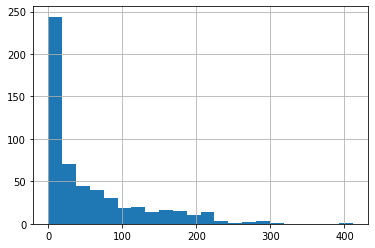

In [228]:
df_all_pff['fantasyPts'].hist(bins='auto')
#df_all_pff['ptsPerSnap'].value_counts()

In [229]:
df_all_pff.dropna(subset=['ptsPerSnap'], inplace=True)

In [230]:
df_all_pff.isna().sum()

player              0
team                0
games               0
position            0
recTarg             0
recRec              0
recRec40s           0
recYds              0
recYds100Games      0
recTds              0
recTd40s            0
recDrops            0
catch               0
depth               0
ypt                 0
ypr                 0
rac                 0
rushCarries         0
rush40s             0
rushYds             0
rushYds100Games     0
rushTds             0
rushTd40s           0
ypc                 0
yac                 0
rushTa              0
fantasyPts          0
ptsPerSnap          0
ptsPerTouch        60
year                0
dtype: int64

-1.10    1
 0.00    1
 0.15    1
 0.20    2
 0.23    1
        ..
 4.90    1
 5.30    1
 5.93    1
 6.10    2
 6.60    1
Name: ptsPerTouch, Length: 248, dtype: int64

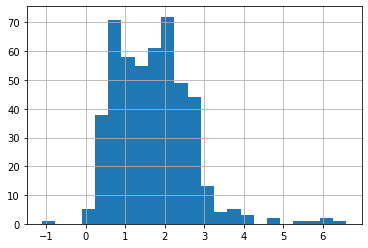

In [231]:
df_all_pff['ptsPerTouch'].hist(bins='auto')
df_all_pff['ptsPerTouch'].value_counts().sort_index()

In [232]:
df_all_pff.loc[df_all_pff['ptsPerTouch']==0.00]

,player,team,games,position,recTarg,recRec,recRec40s,recYds,recYds100Games,recTds,recTd40s,recDrops,catch,depth,ypt,ypr,rac,rushCarries,rush40s,rushYds,rushYds100Games,rushTds,rushTd40s,ypc,yac,rushTa,fantasyPts,ptsPerSnap,ptsPerTouch,year
406,Melvin Ingram III,LAC,1,RB,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0.0,0.0,0,13.5,0.0,0.0,2018


In [233]:
df_all_pff.loc[df_all_pff['ptsPerTouch'].isna()]

,player,team,games,position,recTarg,recRec,recRec40s,recYds,recYds100Games,recTds,recTd40s,recDrops,catch,depth,ypt,ypr,rac,rushCarries,rush40s,rushYds,rushYds100Games,rushTds,rushTd40s,ypc,yac,rushTa,fantasyPts,ptsPerSnap,ptsPerTouch,year
16,Chris Lacy,DET,1,WR,1,0,0,0,0,0,0,0,0.0,10.00,0.0,0.0,0.0,0,0,0,0,0,0,0.0,0.0,0,1.7,0.0,NaN,2018
24,Malachi Dupre,ARZ,1,WR,0,0,0,0,0,0,0,0,0.0,0.00,0.0,0.0,0.0,0,0,0,0,0,0,0.0,0.0,0,5.8,0.0,NaN,2018
31,Jaydon Mickens,JAX,1,WR,0,0,0,0,0,0,0,0,0.0,0.00,0.0,0.0,0.0,0,0,0,0,0,0,0.0,0.0,0,27.9,0.0,NaN,2018
32,Max McCaffrey,SF,1,WR,0,0,0,0,0,0,0,0,0.0,0.00,0.0,0.0,0.0,0,0,0,0,0,0,0.0,0.0,0,4.4,0.0,NaN,2018
33,Johnny Holton,OAK,1,WR,1,0,0,0,0,0,0,0,0.0,40.00,0.0,0.0,0.0,0,0,0,0,0,0,0.0,0.0,0,179.7,0.0,NaN,2018
35,Alonzo Russell,NYG,1,WR,0,0,0,0,0,0,0,0,0.0,0.00,0.0,0.0,0.0,0,0,0,0,0,0,0.0,0.0,0,14.1,0.0,NaN,2018
37,Mose Frazier,CAR,1,WR,0,0,0,0,0,0,0,0,0.0,0.00,0.0,0.0,0.0,0,0,0,0,0,0,0.0,0.0,0,8.0,0.0,NaN,2018
44,Bradley Marquez,DET,1,WR,0,0,0,0,0,0,0,0,0.0,0.00,0.0,0.0,0.0,0,0,0,0,0,0,0.0,0.0,0,223.5,0.0,NaN,2018
74,Mike Wallace,PHI,2,WR,3,0,0,0,0,0,0,0,0.0,35.67,0.0,0.0,0.0,0,0,0,0,0,0,0.0,0.0,0,3.0,0.0,NaN,2018
80,Da'Mari Scott,BUF,1,WR,0,0,0,0,0,0,0,0,0.0,0.00,0.0,0.0,0.0,0,0,0,0,0,0,0.0,0.0,0,35.4,0.0,NaN,2018


In [234]:
df_all_pff['ptsPerTouch'].fillna(0.00, inplace=True)

In [235]:
df_all_pff.isna().sum()

player             0
team               0
games              0
position           0
recTarg            0
recRec             0
recRec40s          0
recYds             0
recYds100Games     0
recTds             0
recTd40s           0
recDrops           0
catch              0
depth              0
ypt                0
ypr                0
rac                0
rushCarries        0
rush40s            0
rushYds            0
rushYds100Games    0
rushTds            0
rushTd40s          0
ypc                0
yac                0
rushTa             0
fantasyPts         0
ptsPerSnap         0
ptsPerTouch        0
year               0
dtype: int64

In [236]:
df_all_pff.dtypes

player              object
team                object
games                int64
position            object
recTarg              int64
recRec               int64
recRec40s            int64
recYds               int64
recYds100Games       int64
recTds               int64
recTd40s             int64
recDrops             int64
catch              float64
depth              float64
ypt                float64
ypr                float64
rac                float64
rushCarries          int64
rush40s              int64
rushYds              int64
rushYds100Games      int64
rushTds              int64
rushTd40s            int64
ypc                float64
yac                float64
rushTa               int64
fantasyPts         float64
ptsPerSnap         float64
ptsPerTouch        float64
year                 int64
dtype: object

### Clean PFF df to CSV

In [237]:
#Save nice clean PFF data to CSV
df_all_pff.to_csv('allpff.csv')

### Final PFF DataFrame

In [238]:
df_all_pff['team'].unique()

array(['HST', 'JAX', 'CLV', 'CAR', 'ATL', 'BUF', 'CIN', 'DEN', 'GB', 'SF',
       'SEA', 'ARZ', 'PIT', 'DET', 'LA', 'DAL', 'OAK', 'TB', 'TEN', 'NYG',
       'WAS', 'MIA', 'NO', 'MIN', 'NE', 'CHI', 'NYJ', 'KC', 'PHI', 'IND',
       'BLT', 'LAC'], dtype=object)

## Football Outsiders (df_FO)

### FO Key / Abbreviations 

In [239]:
df_FO.head(1)

,RK_TEAM,TEAM,OFFENSEDVOA,LASTYEAR,WEI.OFFENSE,RK_WEI.OFFENSE,PASSOFF,RK_PASSOFF,RUSHOFF,RK_RUSHOFF,NON-ADJTOTAL,NON-ADJPASS,NON-ADJRUSH,VAR,RK_VAR,SCHED,RK_SCHED
0,1,KC,34.2,4,30.6,1,62.9,1,11.0,4,33.1,60.2,12.2,7.7,22,-0.9,11



* DVOA: calculates a team's success based on the down-and-distance of each play during the season, then calculates how much more or less successful each team is compared to the league average.
* WEI: The WEIGHTED OFFENSE is adjusted so that earlier games in the season become gradually less important. It better reflects how the team was playing at the end of the season.


In [240]:
"KC" in df_FO['TEAM']

False

In [241]:
df_FO.isna().sum()

RK_TEAM           0
TEAM              0
OFFENSEDVOA       0
LASTYEAR          0
WEI.OFFENSE       0
RK_WEI.OFFENSE    0
PASSOFF           0
RK_PASSOFF        0
RUSHOFF           0
RK_RUSHOFF        0
NON-ADJTOTAL      0
NON-ADJPASS       0
NON-ADJRUSH       0
VAR               0
RK_VAR            0
SCHED             0
RK_SCHED          0
dtype: int64

In [242]:
# realized don't need VAR and SCHED
df_FO.drop(['VAR', 'SCHED'], axis=1, inplace=True)
df_FO.head(2)

,RK_TEAM,TEAM,OFFENSEDVOA,LASTYEAR,WEI.OFFENSE,RK_WEI.OFFENSE,PASSOFF,RK_PASSOFF,RUSHOFF,RK_RUSHOFF,NON-ADJTOTAL,NON-ADJPASS,NON-ADJRUSH,RK_VAR,RK_SCHED
0,1,KC,34.2,4,30.6,1,62.9,1,11.0,4,33.1,60.2,12.2,22,11
1,2,LAR,24.6,6,19.3,2,32.9,5,21.3,1,24.1,32.7,20.4,28,15


In [243]:
# Look-up team names for PFF
df_all_pff['team']

0      HST
1      JAX
2      CLV
3      CAR
4      ATL
      ... 
543    ARZ
544    OAK
545    CAR
546    TEN
547     NO
Name: team, Length: 546, dtype: object

In [244]:
# Match team names of PFF & Football Outsiders
df_FO['TEAM']

0      KC
1     LAR
2     LAC
3      NO
4      NE
5     PIT
6      GB
7     ATL
8     SEA
9     IND
10    CAR
11     TB
12    NYG
13    DEN
14    BAL
15    PHI
16    CLE
17    MIN
18    CIN
19    CHI
20    HOU
21    TEN
22    DET
23    DAL
24    OAK
25    MIA
26     SF
27    NYJ
28    WAS
29    JAX
30    BUF
31    ARI
Name: TEAM, dtype: object

### Match Team Names
* BLT, BAL
* ARZ, ARI
* LA, LAR
* CLV, CLE
* HST, HOU

In [245]:
df_FO['TEAM'].replace('BAL', 'BLT', inplace=True)

In [246]:
df_FO['TEAM'].replace('ARI', 'ARZ', inplace=True)

In [247]:
df_FO['TEAM'].replace('LAR', 'LA', inplace=True)

In [248]:
df_FO['TEAM'].replace('CLE', 'CLV', inplace=True)

In [249]:
df_FO['TEAM'].replace('HOU', 'HST', inplace=True)

In [250]:
df_FO.head(32)

,RK_TEAM,TEAM,OFFENSEDVOA,LASTYEAR,WEI.OFFENSE,RK_WEI.OFFENSE,PASSOFF,RK_PASSOFF,RUSHOFF,RK_RUSHOFF,NON-ADJTOTAL,NON-ADJPASS,NON-ADJRUSH,RK_VAR,RK_SCHED
0,1,KC,34.2,4,30.6,1,62.9,1,11.0,4,33.1,60.2,12.2,22,11
1,2,LA,24.6,6,19.3,2,32.9,5,21.3,1,24.1,32.7,20.4,28,15
2,3,LAC,20.7,7,17.1,3,41.6,2,4.2,7,21.2,39.8,7.4,8,17
3,4,NO,15.9,2,13.4,7,34.5,3,3.3,8,17.5,36.8,4.3,18,31
4,5,NE,14.5,1,16.1,4,33.0,4,2.5,9,13.9,32.4,2.1,5,4
5,6,PIT,13.8,3,15.0,6,25.5,8,-2.4,12,12.9,22.4,0.8,14,22
6,7,GB,11.1,15,10.4,10,18.0,12,12.4,3,8.9,13.8,13.9,17,5
7,8,ATL,8.8,9,7.8,11,26.7,7,-10.7,22,11.7,29.5,-7.5,26,30
8,9,SEA,8.8,14,11.3,9,27.2,6,4.3,6,11.0,32.2,4.5,7,16
9,10,IND,8.2,29,15.9,5,21.3,10,-3.2,13,7.9,21.9,-5.1,12,14


In [251]:
df_all_pff.head(1)

,player,team,games,position,recTarg,recRec,recRec40s,recYds,recYds100Games,recTds,recTd40s,recDrops,catch,depth,ypt,ypr,rac,rushCarries,rush40s,rushYds,rushYds100Games,rushTds,rushTd40s,ypc,yac,rushTa,fantasyPts,ptsPerSnap,ptsPerTouch,year
0,Vyncint Smith,HST,6,WR,9,5,0,91,0,1,0,1,55.6,23.33,10.11,18.2,0.8,0,0,0,0,0,0,0.0,0.0,0,14.6,0.1,3.52,2018


In [252]:
df_FO.head(1)

,RK_TEAM,TEAM,OFFENSEDVOA,LASTYEAR,WEI.OFFENSE,RK_WEI.OFFENSE,PASSOFF,RK_PASSOFF,RUSHOFF,RK_RUSHOFF,NON-ADJTOTAL,NON-ADJPASS,NON-ADJRUSH,RK_VAR,RK_SCHED
0,1,KC,34.2,4,30.6,1,62.9,1,11.0,4,33.1,60.2,12.2,22,11


## Merge all Data (df)


In [253]:
"KC" in df_all_pff['team']

False

In [254]:
#Merge
df = df_all_pff.merge(df_FO, how = 'left', left_on= 'team', right_on= 'TEAM')
df.shape

(546, 45)

In [255]:
df.drop('TEAM' , axis=1, inplace=True)

In [256]:
df[df.isna().any(axis=1)]

,player,team,games,position,recTarg,recRec,recRec40s,recYds,recYds100Games,recTds,recTd40s,recDrops,catch,depth,ypt,ypr,rac,rushCarries,rush40s,rushYds,rushYds100Games,rushTds,rushTd40s,ypc,yac,rushTa,fantasyPts,ptsPerSnap,ptsPerTouch,year,RK_TEAM,OFFENSEDVOA,LASTYEAR,WEI.OFFENSE,RK_WEI.OFFENSE,PASSOFF,RK_PASSOFF,RUSHOFF,RK_RUSHOFF,NON-ADJTOTAL,NON-ADJPASS,NON-ADJRUSH,RK_VAR,RK_SCHED


In [257]:
#df.drop(['VAR', 'SCHED'], axis=1, inplace=True)

df.head(2)

,player,team,games,position,recTarg,recRec,recRec40s,recYds,recYds100Games,recTds,recTd40s,recDrops,catch,depth,ypt,ypr,rac,rushCarries,rush40s,rushYds,rushYds100Games,rushTds,rushTd40s,ypc,yac,rushTa,fantasyPts,ptsPerSnap,ptsPerTouch,year,RK_TEAM,OFFENSEDVOA,LASTYEAR,WEI.OFFENSE,RK_WEI.OFFENSE,PASSOFF,RK_PASSOFF,RUSHOFF,RK_RUSHOFF,NON-ADJTOTAL,NON-ADJPASS,NON-ADJRUSH,RK_VAR,RK_SCHED
0,Vyncint Smith,HST,6,WR,9,5,0,91,0,1,0,1,55.6,23.33,10.11,18.20,0.80,0,0,0,0,0,0,0.0,0.0,0,14.6,0.10,3.52,2018,21,-3.5,25,-1.4,20,17.8,13,-13.0,26,-3.2,17.4,-11.8,20,6
1,Keelan Cole,JAX,16,WR,64,38,0,491,1,1,0,6,59.4,10.19,7.67,12.92,3.63,0,0,0,0,0,0,0.0,0.0,0,5.6,0.11,1.95,2018,30,-22.0,16,-26.6,30,-24.3,30,-10.6,21,-21.8,-20.8,-14.4,13,10


## Binning Data

In [258]:
import plotly.express as px

In [259]:
px.histogram(df, x='fantasyPts', marginal='rug', color = 'position')

In [260]:
px.strip(df, x='fantasyPts', orientation ='h', color = 'position')

In [261]:
bins = [-10, 30, 230,np.inf]
labels = [0,1,2]
df['score bins'] = pd.cut(df['fantasyPts'], bins=bins, labels=labels)
df['score bins'] = df['score bins'].astype(int)
df.head()

,player,team,games,position,recTarg,recRec,recRec40s,recYds,recYds100Games,recTds,recTd40s,recDrops,catch,depth,ypt,ypr,rac,rushCarries,rush40s,rushYds,rushYds100Games,rushTds,rushTd40s,ypc,yac,rushTa,fantasyPts,ptsPerSnap,ptsPerTouch,year,RK_TEAM,OFFENSEDVOA,LASTYEAR,WEI.OFFENSE,RK_WEI.OFFENSE,PASSOFF,RK_PASSOFF,RUSHOFF,RK_RUSHOFF,NON-ADJTOTAL,NON-ADJPASS,NON-ADJRUSH,RK_VAR,RK_SCHED,score bins
0,Vyncint Smith,HST,6,WR,9,5,0,91,0,1,0,1,55.6,23.33,10.11,18.20,0.80,0,0,0,0,0,0,0.00,0.00,0,14.6,0.10,3.52,2018,21,-3.5,25,-1.4,20,17.8,13,-13.0,26,-3.2,17.4,-11.8,20,6,0
1,Keelan Cole,JAX,16,WR,64,38,0,491,1,1,0,6,59.4,10.19,7.67,12.92,3.63,0,0,0,0,0,0,0.00,0.00,0,5.6,0.11,1.95,2018,30,-22.0,16,-26.6,30,-24.3,30,-10.6,21,-21.8,-20.8,-14.4,13,10,0
2,Derrick Willies,CLV,4,WR,5,3,0,61,0,0,0,0,60.0,11.80,12.20,20.33,11.00,0,0,0,0,0,0,0.00,0.00,0,0.0,0.25,2.53,2018,17,-1.1,32,12.3,8,7.8,21,-6.6,17,1.3,8.6,-2.1,19,24,0
3,D.J. Moore,CAR,16,WR,76,54,3,781,1,2,1,4,71.1,9.62,10.28,14.46,7.91,13,0,172,0,0,0,13.23,7.77,6,66.7,0.18,2.00,2018,11,6.0,17,4.1,12,9.2,19,12.9,2,10.7,16.3,14.7,21,32,1
4,Calvin Ridley,ATL,16,WR,91,64,4,821,1,10,3,8,70.3,10.38,9.02,12.83,5.73,5,0,24,0,0,0,4.80,3.00,1,0.0,0.27,2.56,2018,8,8.8,9,7.8,11,26.7,7,-10.7,22,11.7,29.5,-7.5,26,30,0


In [262]:
df.dtypes

player              object
team                object
games                int64
position            object
recTarg              int64
recRec               int64
recRec40s            int64
recYds               int64
recYds100Games       int64
recTds               int64
recTd40s             int64
recDrops             int64
catch              float64
depth              float64
ypt                float64
ypr                float64
rac                float64
rushCarries          int64
rush40s              int64
rushYds              int64
rushYds100Games      int64
rushTds              int64
rushTd40s            int64
ypc                float64
yac                float64
rushTa               int64
fantasyPts         float64
ptsPerSnap         float64
ptsPerTouch        float64
year                 int64
RK_TEAM              int64
OFFENSEDVOA        float64
LASTYEAR             int64
WEI.OFFENSE        float64
RK_WEI.OFFENSE       int64
PASSOFF            float64
RK_PASSOFF           int64
R

## Scaling

In [263]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 546 entries, 0 to 545
Data columns (total 45 columns):
player             546 non-null object
team               546 non-null object
games              546 non-null int64
position           546 non-null object
recTarg            546 non-null int64
recRec             546 non-null int64
recRec40s          546 non-null int64
recYds             546 non-null int64
recYds100Games     546 non-null int64
recTds             546 non-null int64
recTd40s           546 non-null int64
recDrops           546 non-null int64
catch              546 non-null float64
depth              546 non-null float64
ypt                546 non-null float64
ypr                546 non-null float64
rac                546 non-null float64
rushCarries        546 non-null int64
rush40s            546 non-null int64
rushYds            546 non-null int64
rushYds100Games    546 non-null int64
rushTds            546 non-null int64
rushTd40s          546 non-null int64
ypc     

In [264]:
cols_to_drop = ['fantasyPts', 'year']
df.drop(columns=cols_to_drop, inplace=True)

In [265]:
#Number cols to scale
number_cols = list(df.drop('score bins', axis =1).select_dtypes('number').columns)
number_cols

['games',
 'recTarg',
 'recRec',
 'recRec40s',
 'recYds',
 'recYds100Games',
 'recTds',
 'recTd40s',
 'recDrops',
 'catch',
 'depth',
 'ypt',
 'ypr',
 'rac',
 'rushCarries',
 'rush40s',
 'rushYds',
 'rushYds100Games',
 'rushTds',
 'rushTd40s',
 'ypc',
 'yac',
 'rushTa',
 'ptsPerSnap',
 'ptsPerTouch',
 'RK_TEAM',
 'OFFENSEDVOA',
 'LASTYEAR',
 'WEI.OFFENSE',
 'RK_WEI.OFFENSE',
 'PASSOFF',
 'RK_PASSOFF',
 'RUSHOFF',
 'RK_RUSHOFF',
 'NON-ADJTOTAL',
 'NON-ADJPASS',
 'NON-ADJRUSH',
 'RK_VAR',
 'RK_SCHED']

In [266]:
df.head()

,player,team,games,position,recTarg,recRec,recRec40s,recYds,recYds100Games,recTds,recTd40s,recDrops,catch,depth,ypt,ypr,rac,rushCarries,rush40s,rushYds,rushYds100Games,rushTds,rushTd40s,ypc,yac,rushTa,ptsPerSnap,ptsPerTouch,RK_TEAM,OFFENSEDVOA,LASTYEAR,WEI.OFFENSE,RK_WEI.OFFENSE,PASSOFF,RK_PASSOFF,RUSHOFF,RK_RUSHOFF,NON-ADJTOTAL,NON-ADJPASS,NON-ADJRUSH,RK_VAR,RK_SCHED,score bins
0,Vyncint Smith,HST,6,WR,9,5,0,91,0,1,0,1,55.6,23.33,10.11,18.20,0.80,0,0,0,0,0,0,0.00,0.00,0,0.10,3.52,21,-3.5,25,-1.4,20,17.8,13,-13.0,26,-3.2,17.4,-11.8,20,6,0
1,Keelan Cole,JAX,16,WR,64,38,0,491,1,1,0,6,59.4,10.19,7.67,12.92,3.63,0,0,0,0,0,0,0.00,0.00,0,0.11,1.95,30,-22.0,16,-26.6,30,-24.3,30,-10.6,21,-21.8,-20.8,-14.4,13,10,0
2,Derrick Willies,CLV,4,WR,5,3,0,61,0,0,0,0,60.0,11.80,12.20,20.33,11.00,0,0,0,0,0,0,0.00,0.00,0,0.25,2.53,17,-1.1,32,12.3,8,7.8,21,-6.6,17,1.3,8.6,-2.1,19,24,0
3,D.J. Moore,CAR,16,WR,76,54,3,781,1,2,1,4,71.1,9.62,10.28,14.46,7.91,13,0,172,0,0,0,13.23,7.77,6,0.18,2.00,11,6.0,17,4.1,12,9.2,19,12.9,2,10.7,16.3,14.7,21,32,1
4,Calvin Ridley,ATL,16,WR,91,64,4,821,1,10,3,8,70.3,10.38,9.02,12.83,5.73,5,0,24,0,0,0,4.80,3.00,1,0.27,2.56,8,8.8,9,7.8,11,26.7,7,-10.7,22,11.7,29.5,-7.5,26,30,0


### Scale Data

In [267]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
y=df['score bins'].copy()
X=df.drop('score bins', axis=1).copy()

In [268]:
scaler = StandardScaler()

number

In [269]:
X[number_cols] = scaler.fit_transform(X[number_cols])


In [270]:
X.describe().round(3)

,games,recTarg,recRec,recRec40s,recYds,recYds100Games,recTds,recTd40s,recDrops,catch,depth,ypt,ypr,rac,rushCarries,rush40s,rushYds,rushYds100Games,rushTds,rushTd40s,ypc,yac,rushTa,ptsPerSnap,ptsPerTouch,RK_TEAM,OFFENSEDVOA,LASTYEAR,WEI.OFFENSE,RK_WEI.OFFENSE,PASSOFF,RK_PASSOFF,RUSHOFF,RK_RUSHOFF,NON-ADJTOTAL,NON-ADJPASS,NON-ADJRUSH,RK_VAR,RK_SCHED
count,546.000,546.000,546.000,546.000,546.000,546.000,546.000,546.000,546.000,546.000,546.000,546.000,546.000,546.000,546.000,546.000,546.000,546.000,546.000,546.000,546.000,546.000,546.000,546.000,546.000,546.000,546.000,546.000,546.000,546.000,546.000,546.000,546.000,546.000,546.000,546.000,546.000,546.000,546.000
mean,0.000,0.000,-0.000,0.000,0.000,0.000,0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,0.000,-0.000,0.000,0.000,0.000,0.000,-0.000,-0.000,-0.000,-0.000,-0.000,0.000,0.000,-0.000,-0.000,0.000,-0.000
std,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001
min,-1.929,-0.848,-0.839,-0.459,-0.765,-0.323,-0.657,-0.350,-0.749,-2.135,-1.803,-1.679,-1.571,-1.381,-0.403,-0.205,-0.445,-0.235,-0.336,-0.142,-3.685,-1.862,-0.382,-1.327,-2.500,-1.743,-2.567,-1.746,-2.738,-1.751,-2.532,-1.733,-1.665,-1.749,-2.497,-2.571,-1.866,-1.703,-1.666
25%,-0.933,-0.763,-0.759,-0.459,-0.703,-0.323,-0.657,-0.350,-0.749,-0.221,-0.937,-0.514,-0.467,-0.667,-0.403,-0.205,-0.397,-0.235,-0.336,-0.142,-0.596,-0.705,-0.382,-0.586,-0.749,-0.879,-0.367,-0.868,-0.582,-0.885,-0.435,-0.867,-0.652,-0.874,-0.528,-0.417,-0.648,-0.839,-0.909
50%,0.157,-0.366,-0.398,-0.459,-0.428,-0.323,-0.231,-0.350,-0.229,0.234,-0.040,0.114,0.049,-0.079,-0.403,-0.205,-0.397,-0.235,-0.336,-0.142,-0.596,-0.705,-0.382,-0.153,-0.016,0.093,0.008,0.010,0.016,0.088,0.113,-0.002,-0.155,0.109,0.100,0.164,-0.111,0.026,-0.044
75%,0.915,0.398,0.393,0.446,0.249,-0.323,0.196,-0.350,0.290,0.620,0.645,0.601,0.550,0.602,-0.287,-0.205,-0.269,-0.235,-0.336,-0.142,0.566,0.643,-0.257,0.403,0.651,0.849,0.662,0.888,0.804,0.845,0.651,0.864,0.762,0.875,0.767,0.578,0.731,0.890,0.930
max,1.104,3.852,4.169,6.782,4.620,8.046,5.744,6.484,4.964,1.308,5.210,4.535,6.572,5.306,5.474,13.567,5.776,8.306,8.133,13.344,5.301,5.663,5.244,11.527,4.858,1.605,2.305,1.657,2.031,1.602,2.398,1.621,2.594,1.640,2.204,2.295,2.280,1.646,1.687


In [271]:
X.head()

,player,team,games,position,recTarg,recRec,recRec40s,recYds,recYds100Games,recTds,recTd40s,recDrops,catch,depth,ypt,ypr,rac,rushCarries,rush40s,rushYds,rushYds100Games,rushTds,rushTd40s,ypc,yac,rushTa,ptsPerSnap,ptsPerTouch,RK_TEAM,OFFENSEDVOA,LASTYEAR,WEI.OFFENSE,RK_WEI.OFFENSE,PASSOFF,RK_PASSOFF,RUSHOFF,RK_RUSHOFF,NON-ADJTOTAL,NON-ADJPASS,NON-ADJRUSH,RK_VAR,RK_SCHED
0,Vyncint Smith,HST,-0.791235,WR,-0.592887,-0.638748,-0.459191,-0.473049,-0.323437,-0.230589,-0.350486,-0.229218,-0.220626,2.612021,0.938640,1.516751,-1.142808,-0.403087,-0.205396,-0.397328,-0.234625,-0.335771,-0.142027,-0.595827,-0.704562,-0.382145,-0.400121,1.914628,0.416884,-0.134243,0.888404,-0.003541,0.304000,0.373086,-0.434560,-0.749119,0.983844,-0.124160,0.350538,-0.603217,0.349704,-1.125195
1,Keelan Cole,JAX,1.104395,WR,0.964395,0.683513,-0.459191,0.811374,0.513513,-0.230589,-0.350486,2.367317,-0.089783,0.564261,0.306810,0.621097,-0.301798,-0.403087,-0.205396,-0.397328,-0.234625,-0.335771,-0.142027,-0.595827,-0.704562,-0.382145,-0.338320,0.414338,1.388689,-1.331375,-0.099516,-1.606093,1.385331,-1.517313,1.404741,-0.515205,0.437375,-1.317193,-1.385314,-0.836004,-0.406702,-0.692626
2,Derrick Willies,CLV,-1.170360,WR,-0.706144,-0.718885,-0.459191,-0.569381,-0.323437,-0.657373,-0.350486,-0.748525,-0.069123,0.815166,1.479840,1.878066,1.888395,-0.403087,-0.205396,-0.397328,-0.234625,-0.335771,-0.142027,-0.595827,-0.704562,-0.382145,0.526892,0.968585,-0.015030,0.021060,1.656785,0.867688,-0.993596,-0.075940,0.430993,-0.125347,0.000200,0.164477,-0.049344,0.265254,0.241646,0.821367
3,D.J. Moore,CAR,1.104395,WR,1.304165,1.324609,2.256167,1.742581,0.513513,0.196196,1.358135,1.328703,0.313077,0.475431,0.982661,0.882329,0.970119,-0.151759,-0.205396,0.343100,-0.234625,-0.335771,-0.142027,3.119262,3.793424,0.367949,0.094286,0.462118,-0.662900,0.480500,0.010253,0.346223,-0.561064,-0.013076,0.214605,1.775209,-1.639207,0.767408,0.300552,1.769411,0.457762,1.686506
4,Calvin Ridley,ATL,1.104395,WR,1.728879,1.725294,3.161286,1.871023,0.513513,3.610471,4.775377,3.405930,0.285531,0.593871,0.656388,0.605830,0.322274,-0.306422,-0.205396,-0.294013,-0.234625,-0.335771,-0.142027,0.752051,1.032112,-0.257129,0.650494,0.997253,-0.986836,0.661687,-0.867897,0.581518,-0.669197,0.772719,-1.083725,-0.524951,0.546669,0.831550,0.900375,-0.218225,0.998052,1.470221


## One Hot Encoding

In [272]:
categ_cols = ['team']

In [273]:
#make categorical / One Hot Encoding

X = pd.get_dummies(X, columns= categ_cols)
X.head(2)

,player,games,position,recTarg,recRec,recRec40s,recYds,recYds100Games,recTds,recTd40s,recDrops,catch,depth,ypt,ypr,rac,rushCarries,rush40s,rushYds,rushYds100Games,rushTds,rushTd40s,ypc,yac,rushTa,ptsPerSnap,ptsPerTouch,RK_TEAM,OFFENSEDVOA,LASTYEAR,WEI.OFFENSE,RK_WEI.OFFENSE,PASSOFF,RK_PASSOFF,RUSHOFF,RK_RUSHOFF,NON-ADJTOTAL,NON-ADJPASS,NON-ADJRUSH,RK_VAR,RK_SCHED,team_ARZ,team_ATL,team_BLT,team_BUF,team_CAR,team_CHI,team_CIN,team_CLV,team_DAL,team_DEN,team_DET,team_GB,team_HST,team_IND,team_JAX,team_KC,team_LA,team_LAC,team_MIA,team_MIN,team_NE,team_NO,team_NYG,team_NYJ,team_OAK,team_PHI,team_PIT,team_SEA,team_SF,team_TB,team_TEN,team_WAS
0,Vyncint Smith,-0.791235,WR,-0.592887,-0.638748,-0.459191,-0.473049,-0.323437,-0.230589,-0.350486,-0.229218,-0.220626,2.612021,0.93864,1.516751,-1.142808,-0.403087,-0.205396,-0.397328,-0.234625,-0.335771,-0.142027,-0.595827,-0.704562,-0.382145,-0.400121,1.914628,0.416884,-0.134243,0.888404,-0.003541,0.304000,0.373086,-0.434560,-0.749119,0.983844,-0.124160,0.350538,-0.603217,0.349704,-1.125195,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Keelan Cole,1.104395,WR,0.964395,0.683513,-0.459191,0.811374,0.513513,-0.230589,-0.350486,2.367317,-0.089783,0.564261,0.30681,0.621097,-0.301798,-0.403087,-0.205396,-0.397328,-0.234625,-0.335771,-0.142027,-0.595827,-0.704562,-0.382145,-0.338320,0.414338,1.388689,-1.331375,-0.099516,-1.606093,1.385331,-1.517313,1.404741,-0.515205,0.437375,-1.317193,-1.385314,-0.836004,-0.406702,-0.692626,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## get_group WR (df_wr)

In [274]:
df2 = pd.concat([y, X], axis =1)
df2.head()

,score bins,player,games,position,recTarg,recRec,recRec40s,recYds,recYds100Games,recTds,recTd40s,recDrops,catch,depth,ypt,ypr,rac,rushCarries,rush40s,rushYds,rushYds100Games,rushTds,rushTd40s,ypc,yac,rushTa,ptsPerSnap,ptsPerTouch,RK_TEAM,OFFENSEDVOA,LASTYEAR,WEI.OFFENSE,RK_WEI.OFFENSE,PASSOFF,RK_PASSOFF,RUSHOFF,RK_RUSHOFF,NON-ADJTOTAL,NON-ADJPASS,NON-ADJRUSH,RK_VAR,RK_SCHED,team_ARZ,team_ATL,team_BLT,team_BUF,team_CAR,team_CHI,team_CIN,team_CLV,team_DAL,team_DEN,team_DET,team_GB,team_HST,team_IND,team_JAX,team_KC,team_LA,team_LAC,team_MIA,team_MIN,team_NE,team_NO,team_NYG,team_NYJ,team_OAK,team_PHI,team_PIT,team_SEA,team_SF,team_TB,team_TEN,team_WAS
0,0,Vyncint Smith,-0.791235,WR,-0.592887,-0.638748,-0.459191,-0.473049,-0.323437,-0.230589,-0.350486,-0.229218,-0.220626,2.612021,0.938640,1.516751,-1.142808,-0.403087,-0.205396,-0.397328,-0.234625,-0.335771,-0.142027,-0.595827,-0.704562,-0.382145,-0.400121,1.914628,0.416884,-0.134243,0.888404,-0.003541,0.304000,0.373086,-0.434560,-0.749119,0.983844,-0.124160,0.350538,-0.603217,0.349704,-1.125195,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,Keelan Cole,1.104395,WR,0.964395,0.683513,-0.459191,0.811374,0.513513,-0.230589,-0.350486,2.367317,-0.089783,0.564261,0.306810,0.621097,-0.301798,-0.403087,-0.205396,-0.397328,-0.234625,-0.335771,-0.142027,-0.595827,-0.704562,-0.382145,-0.338320,0.414338,1.388689,-1.331375,-0.099516,-1.606093,1.385331,-1.517313,1.404741,-0.515205,0.437375,-1.317193,-1.385314,-0.836004,-0.406702,-0.692626,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,Derrick Willies,-1.170360,WR,-0.706144,-0.718885,-0.459191,-0.569381,-0.323437,-0.657373,-0.350486,-0.748525,-0.069123,0.815166,1.479840,1.878066,1.888395,-0.403087,-0.205396,-0.397328,-0.234625,-0.335771,-0.142027,-0.595827,-0.704562,-0.382145,0.526892,0.968585,-0.015030,0.021060,1.656785,0.867688,-0.993596,-0.075940,0.430993,-0.125347,0.000200,0.164477,-0.049344,0.265254,0.241646,0.821367,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,D.J. Moore,1.104395,WR,1.304165,1.324609,2.256167,1.742581,0.513513,0.196196,1.358135,1.328703,0.313077,0.475431,0.982661,0.882329,0.970119,-0.151759,-0.205396,0.343100,-0.234625,-0.335771,-0.142027,3.119262,3.793424,0.367949,0.094286,0.462118,-0.662900,0.480500,0.010253,0.346223,-0.561064,-0.013076,0.214605,1.775209,-1.639207,0.767408,0.300552,1.769411,0.457762,1.686506,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,Calvin Ridley,1.104395,WR,1.728879,1.725294,3.161286,1.871023,0.513513,3.610471,4.775377,3.405930,0.285531,0.593871,0.656388,0.605830,0.322274,-0.306422,-0.205396,-0.294013,-0.234625,-0.335771,-0.142027,0.752051,1.032112,-0.257129,0.650494,0.997253,-0.986836,0.661687,-0.867897,0.581518,-0.669197,0.772719,-1.083725,-0.524951,0.546669,0.831550,0.900375,-0.218225,0.998052,1.470221,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [275]:
df_wr =df2.groupby('position').get_group('WR')
df_wr


,score bins,player,games,position,recTarg,recRec,recRec40s,recYds,recYds100Games,recTds,recTd40s,recDrops,catch,depth,ypt,ypr,rac,rushCarries,rush40s,rushYds,rushYds100Games,rushTds,rushTd40s,ypc,yac,rushTa,ptsPerSnap,ptsPerTouch,RK_TEAM,OFFENSEDVOA,LASTYEAR,WEI.OFFENSE,RK_WEI.OFFENSE,PASSOFF,RK_PASSOFF,RUSHOFF,RK_RUSHOFF,NON-ADJTOTAL,NON-ADJPASS,NON-ADJRUSH,RK_VAR,RK_SCHED,team_ARZ,team_ATL,team_BLT,team_BUF,team_CAR,team_CHI,team_CIN,team_CLV,team_DAL,team_DEN,team_DET,team_GB,team_HST,team_IND,team_JAX,team_KC,team_LA,team_LAC,team_MIA,team_MIN,team_NE,team_NO,team_NYG,team_NYJ,team_OAK,team_PHI,team_PIT,team_SEA,team_SF,team_TB,team_TEN,team_WAS
0,0,Vyncint Smith,-0.791235,WR,-0.592887,-0.638748,-0.459191,-0.473049,-0.323437,-0.230589,-0.350486,-0.229218,-0.220626,2.612021,0.938640,1.516751,-1.142808,-0.403087,-0.205396,-0.397328,-0.234625,-0.335771,-0.142027,-0.595827,-0.704562,-0.382145,-0.400121,1.914628,0.416884,-0.134243,0.888404,-0.003541,0.304000,0.373086,-0.434560,-0.749119,0.983844,-0.124160,0.350538,-0.603217,0.349704,-1.125195,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,Keelan Cole,1.104395,WR,0.964395,0.683513,-0.459191,0.811374,0.513513,-0.230589,-0.350486,2.367317,-0.089783,0.564261,0.306810,0.621097,-0.301798,-0.403087,-0.205396,-0.397328,-0.234625,-0.335771,-0.142027,-0.595827,-0.704562,-0.382145,-0.338320,0.414338,1.388689,-1.331375,-0.099516,-1.606093,1.385331,-1.517313,1.404741,-0.515205,0.437375,-1.317193,-1.385314,-0.836004,-0.406702,-0.692626,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,Derrick Willies,-1.170360,WR,-0.706144,-0.718885,-0.459191,-0.569381,-0.323437,-0.657373,-0.350486,-0.748525,-0.069123,0.815166,1.479840,1.878066,1.888395,-0.403087,-0.205396,-0.397328,-0.234625,-0.335771,-0.142027,-0.595827,-0.704562,-0.382145,0.526892,0.968585,-0.015030,0.021060,1.656785,0.867688,-0.993596,-0.075940,0.430993,-0.125347,0.000200,0.164477,-0.049344,0.265254,0.241646,0.821367,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,D.J. Moore,1.104395,WR,1.304165,1.324609,2.256167,1.742581,0.513513,0.196196,1.358135,1.328703,0.313077,0.475431,0.982661,0.882329,0.970119,-0.151759,-0.205396,0.343100,-0.234625,-0.335771,-0.142027,3.119262,3.793424,0.367949,0.094286,0.462118,-0.662900,0.480500,0.010253,0.346223,-0.561064,-0.013076,0.214605,1.775209,-1.639207,0.767408,0.300552,1.769411,0.457762,1.686506,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,Calvin Ridley,1.104395,WR,1.728879,1.725294,3.161286,1.871023,0.513513,3.610471,4.775377,3.405930,0.285531,0.593871,0.656388,0.605830,0.322274,-0.306422,-0.205396,-0.294013,-0.234625,-0.335771,-0.142027,0.752051,1.032112,-0.257129,0.650494,0.997253,-0.986836,0.661687,-0.867897,0.581518,-0.669197,0.772719,-1.083725,-0.524951,0.546669,0.831550,0.900375,-0.218225,0.998052,1.470221,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233,1,Pierre Garcon,-0.412109,WR,0.313168,0.122554,-0.459191,0.153107,-0.323437,-0.230589,-0.350486,1.328703,-0.120772,0.458289,0.128136,0.451465,-0.153209,-0.403087,-0.205396,-0.397328,-0.234625,-0.335771,-0.142027,-0.595827,-0.704562,-0.382145,-0.276519,0.404782,1.064754,-0.904290,0.229791,-0.963800,1.169065,-0.295962,0.647381,-1.665285,1.639607,-0.842545,-0.340168,-1.301576,-0.082528,0.496940,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
234,1,Matthew Slater,-0.601672,WR,-0.847715,-0.839090,-0.459191,-0.765255,-0.323437,-0.657373,-0.350486,-0.748525,-2.135071,-1.023766,-1.679314,-1.570542,-1.380550,-0.403087,-0.205396,-0.397328,-0.234625,-0.335771,-0.142027,-0.595827,-0.704562,-0.382145,-1.018130,-1.449080,-1.310771,1.030533,-1.746048,

## get_group RB (df_rb)

In [276]:
df_rb =df2.groupby('position').get_group('RB')
df_rb


,score bins,player,games,position,recTarg,recRec,recRec40s,recYds,recYds100Games,recTds,recTd40s,recDrops,catch,depth,ypt,ypr,rac,rushCarries,rush40s,rushYds,rushYds100Games,rushTds,rushTd40s,ypc,yac,rushTa,ptsPerSnap,ptsPerTouch,RK_TEAM,OFFENSEDVOA,LASTYEAR,WEI.OFFENSE,RK_WEI.OFFENSE,PASSOFF,RK_PASSOFF,RUSHOFF,RK_RUSHOFF,NON-ADJTOTAL,NON-ADJPASS,NON-ADJRUSH,RK_VAR,RK_SCHED,team_ARZ,team_ATL,team_BLT,team_BUF,team_CAR,team_CHI,team_CIN,team_CLV,team_DAL,team_DEN,team_DET,team_GB,team_HST,team_IND,team_JAX,team_KC,team_LA,team_LAC,team_MIA,team_MIN,team_NE,team_NO,team_NYG,team_NYJ,team_OAK,team_PHI,team_PIT,team_SEA,team_SF,team_TB,team_TEN,team_WAS
238,1,Trenton Cannon,0.535706,RB,-0.111546,-0.157926,-0.459191,-0.302863,-0.323437,-0.657373,-0.350486,1.328703,0.116812,-0.046638,-0.244748,-0.133763,0.785869,0.331562,-0.205396,0.089116,-0.234625,0.162411,-0.142027,0.238172,0.817923,0.742996,0.341490,-0.751493,1.172733,-1.169600,0.778635,-0.951082,1.060932,-0.794381,1.188352,-1.499595,1.421019,-1.374921,-0.885461,-1.865635,1.106109,-1.665907,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
239,1,Nyheim Hines,1.104395,RB,1.360794,1.685226,-0.459191,0.599445,-0.323437,0.196196,-0.350486,1.328703,0.647072,-0.632603,-0.268053,-0.425530,0.224205,1.240207,-0.205396,0.950079,-0.234625,0.660593,-0.142027,0.437546,0.632677,0.367949,0.588693,-0.617709,-0.770879,0.622862,1.327479,1.096624,-1.317995,0.530245,-0.759142,0.206032,-0.436975,0.587812,0.555023,-0.003345,-0.514759,-0.260057,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
240,0,Jaylen Samuels,0.156580,RB,-0.026603,0.202691,-0.459191,-0.126255,-0.323437,0.622980,-0.350486,-0.748525,0.953520,-1.050259,0.097062,-0.272861,1.145453,0.679554,-0.205396,0.704705,0.985424,-0.335771,-0.142027,0.687465,0.817923,-0.007098,1.083101,-0.560373,-1.202792,0.985236,-1.526510,1.039390,-1.209862,0.718836,-0.975531,0.284003,-0.546269,0.908520,0.577743,0.524900,-0.298644,0.605082,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
241,1,Gus Edwards,0.156580,RB,-0.791087,-0.758953,-0.459191,-0.701034,-0.323437,-0.657373,-0.350486,-0.748525,1.308175,-0.790003,0.910156,0.125773,1.145453,2.245516,1.762085,2.693529,3.425521,0.660593,-0.142027,0.875606,1.159469,2.493215,0.835897,-0.856609,-0.230987,0.150480,0.449328,0.002819,0.195867,0.278791,-0.326366,0.332736,-0.764856,0.228619,0.164229,0.730827,-1.595339,1.145794,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
242,1,Mark Walton,-0.222546,RB,-0.649516,-0.638748,-0.459191,-0.633602,-0.323437,-0.657373,-0.350486,-0.229218,0.323407,-1.290255,-0.161885,-0.179564,1.412913,-0.132427,-0.205396,-0.250964,-0.234625,-0.335771,-0.142027,0.086536,0.372176,-0.382145,-0.338320,-0.942613,0.200927,-0.121301,0.559097,-0.550444,0.736533,0.000395,0.106411,0.167046,-0.327681,-0.085675,0.009729,0.247348,0.673878,0.172513,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
406,0,Nick Bellore,0.725269,RB,-0.734458,-0.678816,-0.459191,-0.717089,-0.323437,-0.657373,-0.350486,-0.748525,1.308175,-0.984805,-0.708263,-0.934424,-0.340431,-0.383754,-0.205396,-0.397328,-0.234625,-0.335771,-0.142027,-0.595827,-0.704562,-0.382145,-0.832728,-0.780161,0.632840,-0.244250,-0.538591,-0.086212,0.520267,-0.260040,0.539187,-0.651655,0.874550,-0.380726,-0.417418,-0.639031,-0.190586,-1.449622,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
407,0,Anthony Sherman,1.104395,RB,-0.592887,-0.518542,-0.459191,-0.456994,-0.323437,-0.230589,-0.350486,-0.229218,0.925974,-0.331829,1.083651,0.465036,0.812615,-0.383754,-0.205396,-0.388719,-0.234625,-0.335771,-0.142027,-0.034211,-0.125670,-0.382145,0.217888,0.653238,-1.742685,2.305317,

# MODELS

## Functions

In [307]:
def evaluate_model(X_test, y_test, classifier):

    from sklearn.metrics import plot_confusion_matrix, accuracy_score, roc_auc_score, roc_curve


    # Make predictions for test data
    y_pred = classifier.predict(X_test)
    if y_test.ndim>1:
        
        y_test = y_test.argmax(axis=1)

    # Calculate accuracy 
    acc = accuracy_score(y_test,y_pred) * 100
    print('Accuracy is :{0}'.format(round(acc, 2)))


    # Create Confusion Matrix
    plot_confusion_matrix(classifier, X_test, y_test, normalize='true',
                          cmap='Blues', display_labels= ['NonBuyers', 'Buyers'])
    plt.show()

## Decesion Tree

### X and y for RB

In [311]:
y =df_rb['score bins'].copy()
y.value_counts(normalize=True)

0    0.497110
1    0.462428
2    0.040462
Name: score bins, dtype: float64

In [279]:
drop_cols= ['player', 'position', 'score bins',]

In [280]:
X = df_rb.drop(columns=drop_cols).copy()

In [281]:
# An 80/20 split with random_state of 10
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=10)

In [282]:
X[X.isna().any(axis=1)]

,games,recTarg,recRec,recRec40s,recYds,recYds100Games,recTds,recTd40s,recDrops,catch,depth,ypt,ypr,rac,rushCarries,rush40s,rushYds,rushYds100Games,rushTds,rushTd40s,ypc,yac,rushTa,ptsPerSnap,ptsPerTouch,RK_TEAM,OFFENSEDVOA,LASTYEAR,WEI.OFFENSE,RK_WEI.OFFENSE,PASSOFF,RK_PASSOFF,RUSHOFF,RK_RUSHOFF,NON-ADJTOTAL,NON-ADJPASS,NON-ADJRUSH,RK_VAR,RK_SCHED,team_ARZ,team_ATL,team_BLT,team_BUF,team_CAR,team_CHI,team_CIN,team_CLV,team_DAL,team_DEN,team_DET,team_GB,team_HST,team_IND,team_JAX,team_KC,team_LA,team_LAC,team_MIA,team_MIN,team_NE,team_NO,team_NYG,team_NYJ,team_OAK,team_PHI,team_PIT,team_SEA,team_SF,team_TB,team_TEN,team_WAS


In [283]:
from sklearn.metrics import accuracy_score, plot_confusion_matrix, roc_curve, auc

## Grid Search



In [284]:
from sklearn.model_selection import GridSearchCV, cross_val_score

In [312]:
model = DecisionTreeClassifier(random_state=42, class_weight='balanced')

In [313]:
# create a dictionary for Combinatoric Grid Searching
dt_param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 2, 3, 4, 5, 6],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 3, 4, 5, 6]
}

# Instantiate GridSearchCV
dt_grid_search = GridSearchCV(model, dt_param_grid, cv=3, return_train_score=True)

# Fit to the data
dt_grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=42,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'cr

In [314]:
dt_grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'min_samples_leaf': 5,
 'min_samples_split': 2}

In [315]:
dt_grid_search.best_score_

0.47826086956521735

In [289]:
dt_best_model = dt_grid_search.best_estimator_
sort = pd.Series(dt_best_model.feature_importances_,
                 index=X_train.columns).sort_values(ascending=False)

sort

ptsPerSnap        0.167315
recYds100Games    0.088303
ypt               0.086807
ypc               0.081883
recRec40s         0.081093
                    ...   
team_ATL          0.000000
team_ARZ          0.000000
RK_VAR            0.000000
NON-ADJRUSH       0.000000
NON-ADJPASS       0.000000
Length: 71, dtype: float64

In [291]:
## visualize the decision tree
def visualize_tree(tree,feature_names=None,class_names=['0','1'],export_graphviz_kws={}):
    """Visualizes a sklearn tree using sklearn.tree.export_graphviz"""
    from sklearn.tree import export_graphviz
    from IPython.display import SVG
    from graphviz import Source
    from IPython.display import display
    if feature_names is None:
        feature_names=X_train.columns

    tree_viz_kws =  dict(out_file=None, rotate=False, filled = True)
    tree_viz_kws.update(export_graphviz_kws)

    # tree.export_graphviz(dt) #if you wish to save the output to a dot file instead
    graph = Source(export_graphviz(tree,feature_names=feature_names,**tree_viz_kws))
    display(SVG(graph.pipe(format='svg')))

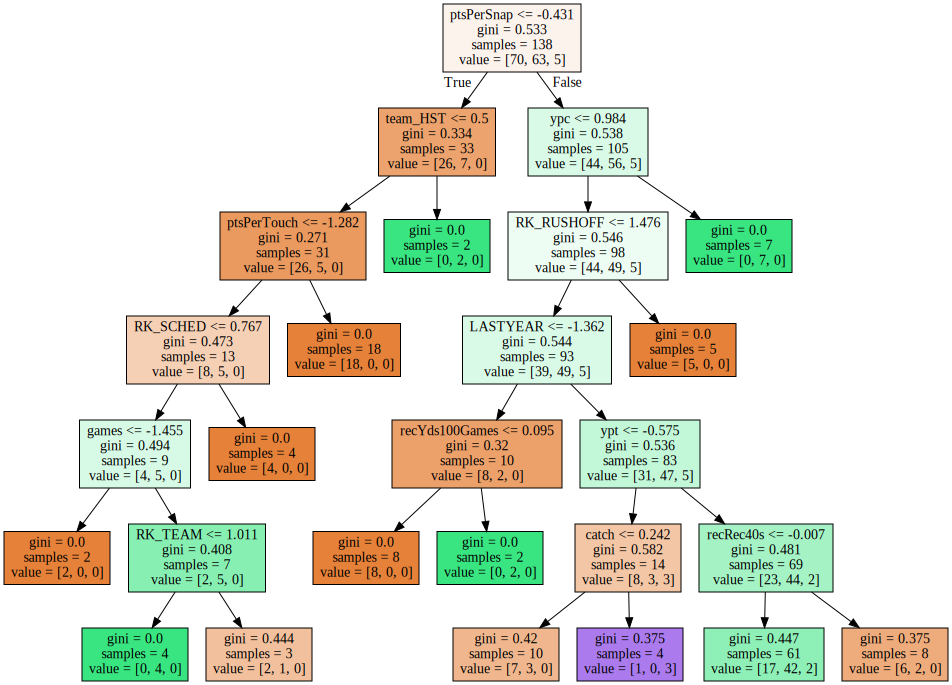

In [292]:
visualize_tree(dt_grid_search.best_estimator_)

### RB Decesion Tree

In [317]:
# Train Decesion Tree Classication
dtree = DecisionTreeClassifier(class_weight='balanced', **dt_grid_search.best_params_)  
dtree.fit(X_train, y_train) 

DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced',
                       criterion='entropy', max_depth=5, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=5,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=None,
                       splitter='best')

In [318]:
# Make predictions for test data
y_pred = dtree.predict(X_test)

#### RB Evaluate Model

Accuracy is :28.57


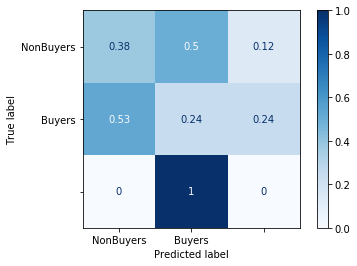

In [319]:
evaluate_model(X_test, y_test, dtree)

#### Feature Importance & Corr Matrix

In [296]:
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    sort = pd.Series(model.feature_importances_,index=X_train.columns).sort_values(ascending=False).head(10)
    sort.plot(kind ='barh')
 
    plt.title('Feature Importance')
    plt.ylabel('Feature')
    
    plt.show()
    
    return sort

def get_corr(df, model, target='score bins'):
    sort = plot_feature_importances(model)
    
    fig, ax = plt.subplots(figsize=(5,5))
    
    df_corr = df.corr()[target]
    df_corr.loc[sort.index].plot(kind='barh', ax=ax)
    ax.set_xlabel('Correlation with Fantasy Points', fontdict=dict(size=12))
           
    ax.set_title('Correlation of Most Important Features', fontdict=dict(size=14))
    ax.axvline(0.0)
    plt.show()
    
    #return fig

In [ ]:
df_rb.dtypes

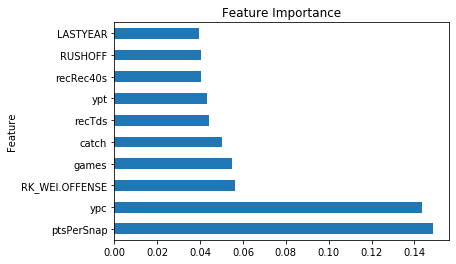

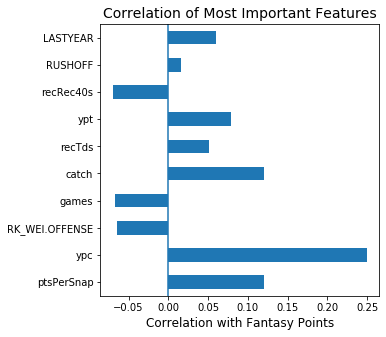

In [297]:
get_corr(df_rb, dtree)

### WR Decision Tree

#### X and y for WR

In [ ]:
y = df_wr['score bins']

In [ ]:
X = df_wr.drop(columns=drop_cols)

In [ ]:
drop_cols

In [ ]:
# An 80/20 split with random_state of 10
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=10)

#### Train Model

In [ ]:
dtree.fit(X_train, y_train)

#### Evaluate Model

In [ ]:
evaluate_model(X_test, y_test, dtree)

#### Features Importance & Corr Matrix

In [ ]:
get_corr(df_wr, dtree)

## Random Forest

### Grid Search

In [ ]:
model = RandomForestClassifier(random_state=42)

In [ ]:
# create a dictionary for Combinatoric Grid Searching
rf_param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 2, 3, 4, 5, 6],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 3, 4, 5, 6]
}

# Instantiate GridSearchCV
rf_grid_search = GridSearchCV(model, dt_param_grid, cv=3, return_train_score=True)

# Fit to the data
rf_grid_search.fit(X_train, y_train)

In [ ]:
rf_grid_search.best_params_

In [ ]:
rf_grid_search.best_score_

### RB Random Forest

#### X  and y for RB

In [ ]:
y =df_rb['score bins'].copy()

In [ ]:
X = df_rb.drop(columns=drop_cols).copy()

In [ ]:
# An 80/20 split with random_state of 10
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=10)

#### Train Model

In [ ]:
# Train Random Forest Classication
rf = RandomForestClassifier()  
rf.fit(X_train, y_train) 

In [ ]:
# Make predictions for test data
# y_pred = rf.predict(X_test)

#### Evaluate Model

In [ ]:
evaluate_model(X_test, y_test, rf)

#### Features Importance & Corr Matrix

In [ ]:
get_corr(df_rb, rf)

### WR Random Forest

#### X and y for WR

In [ ]:
y = df_wr['score bins']

In [ ]:
X = df_wr.drop(columns=drop_cols)

In [ ]:
# An 80/20 split with random_state of 10
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=10)

#### Train Model

In [ ]:
# Train Random Forest Classication
rf = RandomForestClassifier()  
rf.fit(X_train, y_train) 

#### Evaluate Model

In [ ]:
evaluate_model(X_test, y_test, rf)

#### Features Importance & Corr Matrix

In [ ]:
get_corr(df_wr, rf)

## XGBoost

In [ ]:
from xgboost import XGBClassifier

#### RB XGBoost 

#### X  and y for RB

In [ ]:
y =df_rb['score bins'].copy()

In [ ]:
X = df_rb.drop(columns=drop_cols).copy()

In [ ]:
# An 80/20 split with random_state of 10
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=10)

In [ ]:
# Train XGBoost Classication
xgb = XGBClassifier()  
xgb.fit(X_train, y_train) 

In [ ]:
# Make predictions for test data
y_pred = xgb.predict(X_test)

#### Evaluate Model

In [ ]:
evaluate_model(X_test, y_test, xgb)

#### Features Importance & Corr Matrix

### WR XGBoost

#### X and y for WR

In [ ]:
y = df_wr['score bins'].copy()

In [ ]:
X = df_wr.drop(columns=drop_cols).copy()

In [ ]:
# An 80/20 split with random_state of 10
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=10)

In [ ]:
# Train XGBoost Classication
xgb = XGBClassifier()  
xgb.fit(X_train, y_train) 

In [ ]:
# Make predictions for test data
y_pred = xgb.predict(X_test)

#### Evaluate Model

In [ ]:
evaluate_model(X_test, y_test, xgb)

# INTERPRET 